In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Example job categories
jobs = ["doctor", "dentist", "engineer", "teacher", "lawyer", "nurse", "pharmacist", "architect", 
        "chef", "scientist", "musician", "artist", "pilot", "firefighter", "police officer", 
        "accountant", "software developer", "mechanic", "electrician", "plumber", 
        "salesperson", "marketing manager", "graphic designer", "journalist", 
        "data analyst", "psychologist", "biologist", "chemist", "physicist", "economist"]

# Generate random height, weight, and job
data = []
for _ in range(2000):
    height = round(random.uniform(1.5, 2.0), 2)  # height in meters
    weight = round(random.uniform(50, 100), 2)   # weight in kg
    job = random.choice(jobs)
    data.append([height, weight, job])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Height_m', 'Weight_kg', 'Job'])

# Save to CSV
df.to_csv('persons_dataset.csv', index=False)

print("Dataset generated and saved as 'persons_dataset.csv'")


Dataset generated and saved as 'persons_dataset.csv'


In [3]:
df

,Height_m,Weight_kg,Job
0,1.72,54.86,graphic designer
1,1.72,83.17,musician
2,1.79,57.23,firefighter
3,1.81,87.13,chef
4,1.57,56.98,journalist
...,...,...,...
1995,1.79,55.58,musician
1996,1.67,55.03,plumber
1997,1.55,57.84,lawyer
1998,1.96,88.29,lawyer


In [4]:
def calculate_bmi(row):
    weight = row["Weight_kg"]
    height = row["Height_m"]
    return  weight / (height ** 2)

def assign_bmi(row):
    bmi = row["bmi"]
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    return "Overweight"

df["bmi"] = df.apply(calculate_bmi, axis = 1)
df["bmi_category"] = df.apply(assign_bmi, axis = 1)
df

,Height_m,Weight_kg,Job,bmi,bmi_category
0,1.72,54.86,graphic designer,18.543807,Normal weight
1,1.72,83.17,musician,28.113169,Overweight
2,1.79,57.23,firefighter,17.861490,Underweight
3,1.81,87.13,chef,26.595647,Overweight
4,1.57,56.98,journalist,23.116556,Normal weight
...,...,...,...,...,...
1995,1.79,55.58,musician,17.346525,Underweight
1996,1.67,55.03,plumber,19.731794,Normal weight
1997,1.55,57.84,lawyer,24.074922,Normal weight
1998,1.96,88.29,lawyer,22.982611,Normal weight


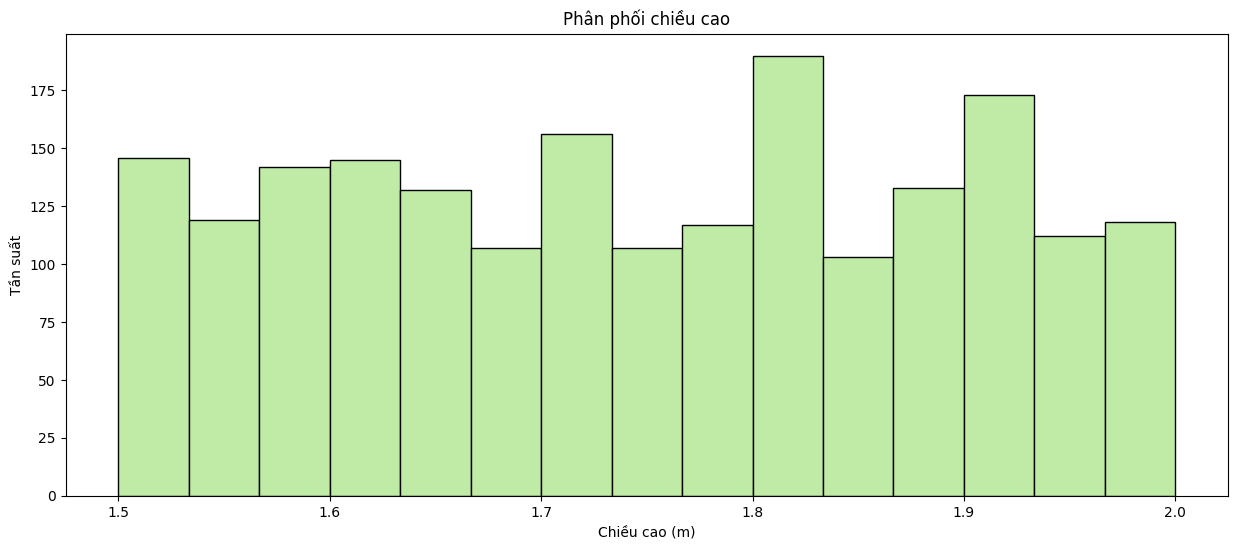

In [5]:
plt.figure(figsize=(15,6))
plt.hist(df["Height_m"], bins=15, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối chiều cao')
plt.xlabel('Chiều cao (m)')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

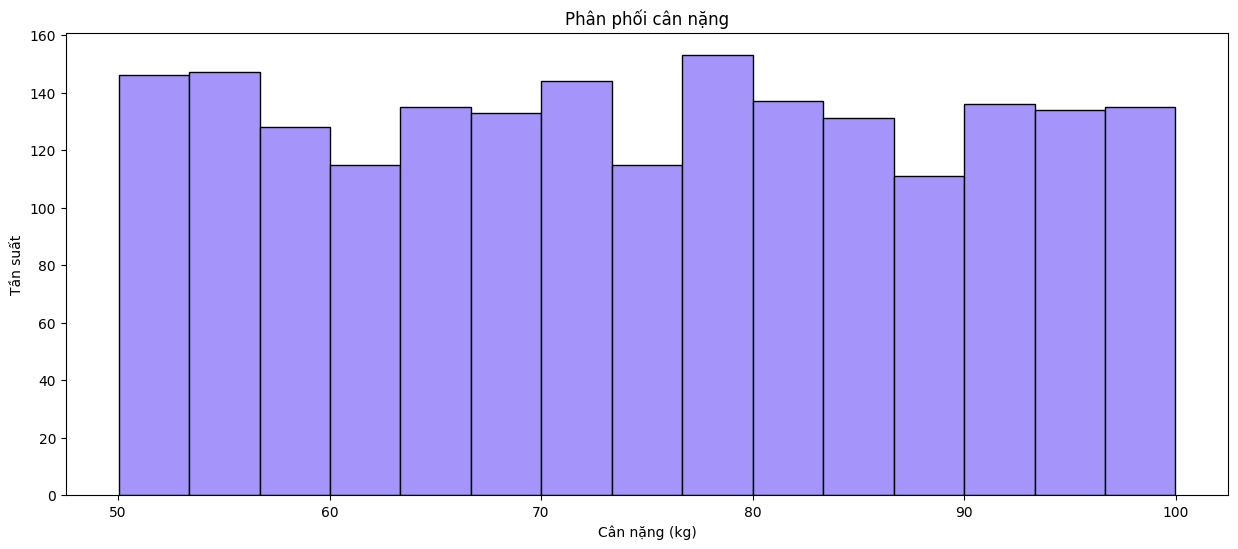

In [6]:
plt.figure(figsize=(15,6))
plt.hist(df["Weight_kg"], bins=15, color='#A594F9', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

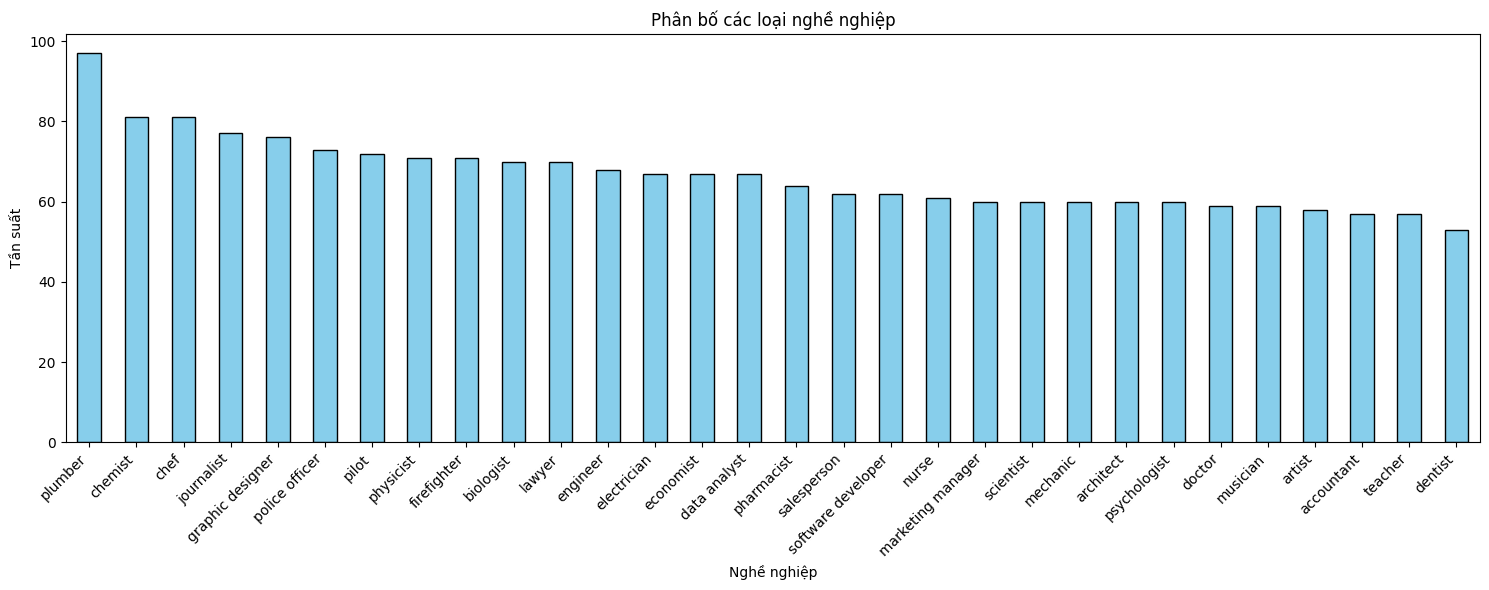

In [7]:
job_counts = df['Job'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân bố các loại nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')  # Xoay nhãn cho dễ nhìn
plt.tight_layout()
plt.show()

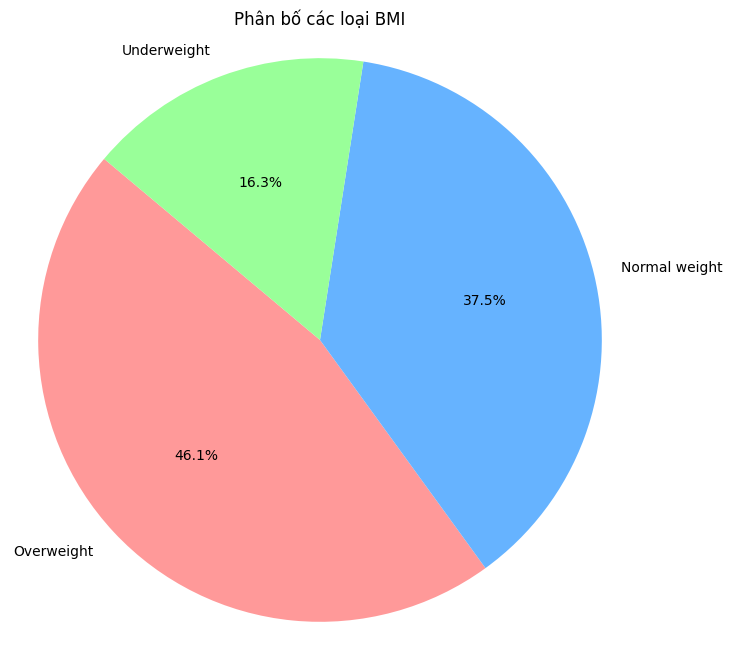

In [8]:
# Tính toán tần suất của các loại BMI
bmi_counts = df['bmi_category'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Phân bố các loại BMI')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df["Job_encode"] = LabelEncoder().fit_transform(df["Job"])
df

,Height_m,Weight_kg,Job,bmi,bmi_category,Job_encode
0,1.72,54.86,graphic designer,18.543807,Normal weight,13
1,1.72,83.17,musician,28.113169,Overweight,18
2,1.79,57.23,firefighter,17.861490,Underweight,12
3,1.81,87.13,chef,26.595647,Overweight,4
4,1.57,56.98,journalist,23.116556,Normal weight,14
...,...,...,...,...,...,...
1995,1.79,55.58,musician,17.346525,Underweight,18
1996,1.67,55.03,plumber,19.731794,Normal weight,23
1997,1.55,57.84,lawyer,24.074922,Normal weight,15
1998,1.96,88.29,lawyer,22.982611,Normal weight,15


In [11]:
X = df[["Height_m", "Job_encode"]]
y = df["Weight_kg"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_pred, y_test))

MSE: 215.0846733748226


In [14]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [15]:
df['Job'].values

array(['graphic designer', 'musician', 'firefighter', ..., 'lawyer',
       'lawyer', 'doctor'], dtype=object)

In [16]:
lb = LabelEncoder()
lb.fit(df['Job'].values)
job_encode = lb.transform(['architect'])
with open("./model.pkl", "rb") as f:
    model = pickle.load(f)
weight_predict = model.predict([[1.82, job_encode[0]]])
weight_predict[0]

C:\Users\xin chao\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.72517720739208

In [17]:
X_train_dl = X_train.values.astype(np.float32)

In [18]:
import tensorflow as tf
import numpy as np

# Mô hình CNN với tf.Module
class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([64, 64]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([64, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 2, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 64])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output


# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

X_train_dl = X_train.values.astype(np.float32)
y_train_dl = y_train.values.astype(np.float32)
X_test_dl = X_test.values.astype(np.float32)
y_test_dl = y_test.values.astype(np.float32)
# Store loss values
loss_values = []

# Huấn luyện mô hình
epochs = 1000
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i+batch_size]
        y_batch = y_train_dl[i:i+batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    loss_values.append(epoch_loss / (len(X_train_dl) // batch_size))
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / (len(X_train_dl) // batch_size)}')


Epoch 1/1000, Loss: 2205.21294921875
Epoch 2/1000, Loss: 1460.385301513672
Epoch 3/1000, Loss: 1038.395977783203
Epoch 4/1000, Loss: 631.7831561279297
Epoch 5/1000, Loss: 392.21211669921877
Epoch 6/1000, Loss: 298.10551025390623
Epoch 7/1000, Loss: 269.4827536010742
Epoch 8/1000, Loss: 262.8243280029297
Epoch 9/1000, Loss: 260.48866149902346
Epoch 10/1000, Loss: 259.8092102050781
Epoch 11/1000, Loss: 259.5241052246094
Epoch 12/1000, Loss: 259.46649963378906
Epoch 13/1000, Loss: 259.4349853515625
Epoch 14/1000, Loss: 259.4325732421875
Epoch 15/1000, Loss: 259.4800259399414
Epoch 16/1000, Loss: 259.4743276977539
Epoch 17/1000, Loss: 259.54597229003906
Epoch 18/1000, Loss: 259.571491394043
Epoch 19/1000, Loss: 259.5712088012695
Epoch 20/1000, Loss: 259.67968292236327
Epoch 21/1000, Loss: 259.6325814819336
Epoch 22/1000, Loss: 259.64547271728514
Epoch 23/1000, Loss: 259.66138671875
Epoch 24/1000, Loss: 259.75156494140623
Epoch 25/1000, Loss: 259.74240234375
Epoch 26/1000, Loss: 259.7695736

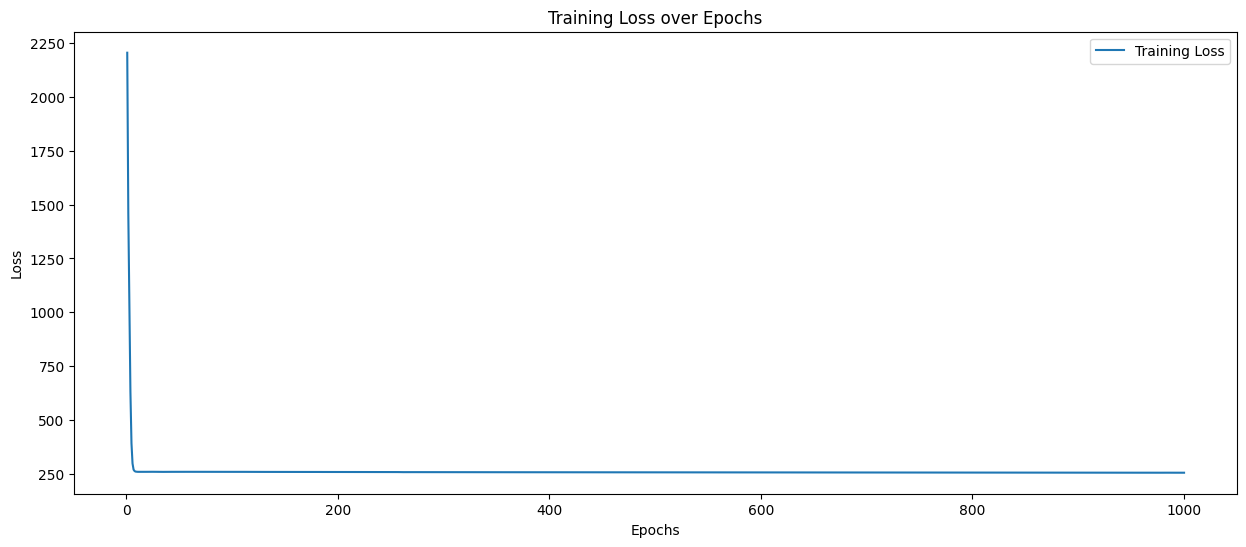

In [19]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(range(1, epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [20]:
# Save mô hình
conv1_weights_np = model.conv1.numpy()
np.save('conv1_weights.npy', conv1_weights_np)

dense1_weights_np = model.dense1.numpy()
np.save('dense1_weights.npy', dense1_weights_np)

dense2_weights_np = model.dense2.numpy()
np.save('dense2_weights.npy', dense2_weights_np)

In [23]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Instantiate model
model = SimpleRNN(input_size=2, hidden_size=64)

# Instantiate optimizer
optimizer = tf.optimizers.Adam()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

X_train_dl = X_train.values.astype(np.float32).reshape(-1, 1, 2)

loss_values = []

epochs = 1000
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
    loss_values.append(loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}')


Epoch 1/1000, Loss: 5535.068359375
Epoch 2/1000, Loss: 4578.4951171875
Epoch 3/1000, Loss: 3961.832275390625
Epoch 4/1000, Loss: 3351.4404296875
Epoch 5/1000, Loss: 2826.36865234375
Epoch 6/1000, Loss: 2393.8310546875
Epoch 7/1000, Loss: 2079.2421875
Epoch 8/1000, Loss: 1683.328857421875
Epoch 9/1000, Loss: 1470.94140625
Epoch 10/1000, Loss: 1250.2530517578125
Epoch 11/1000, Loss: 1108.12939453125
Epoch 12/1000, Loss: 979.730712890625
Epoch 13/1000, Loss: 858.249267578125
Epoch 14/1000, Loss: 745.276611328125
Epoch 15/1000, Loss: 657.445068359375
Epoch 16/1000, Loss: 581.9796752929688
Epoch 17/1000, Loss: 505.9298095703125
Epoch 18/1000, Loss: 446.04345703125
Epoch 19/1000, Loss: 398.8952941894531
Epoch 20/1000, Loss: 355.0207824707031
Epoch 21/1000, Loss: 299.3836669921875
Epoch 22/1000, Loss: 275.9080810546875
Epoch 23/1000, Loss: 256.2977294921875
Epoch 24/1000, Loss: 239.85354614257812
Epoch 25/1000, Loss: 226.11090087890625
Epoch 26/1000, Loss: 214.65927124023438
Epoch 27/1000, Lo

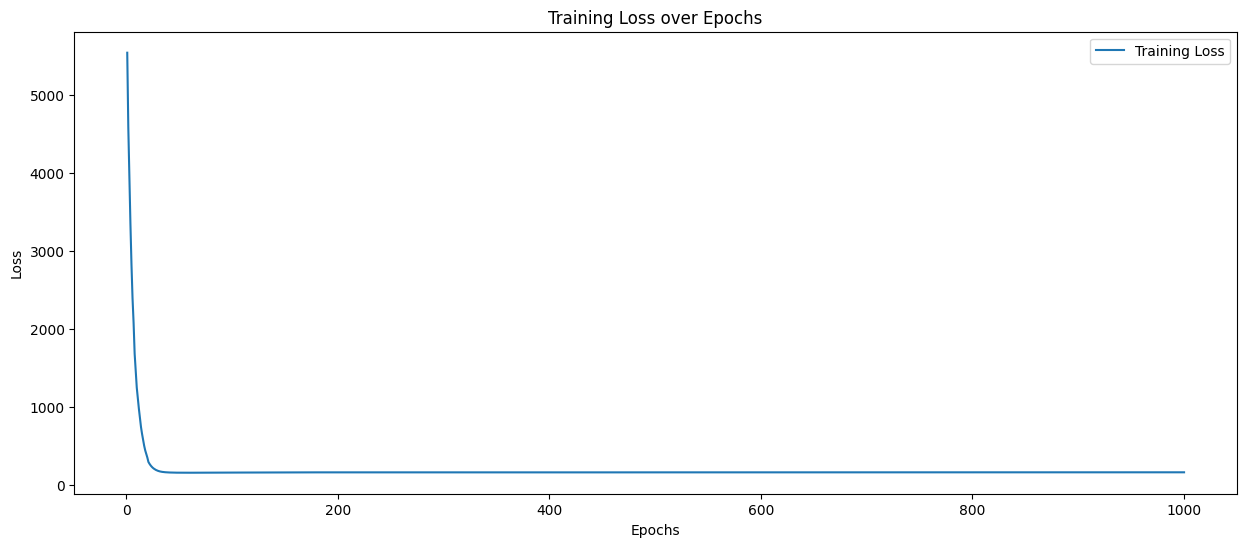

In [24]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(range(1, epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

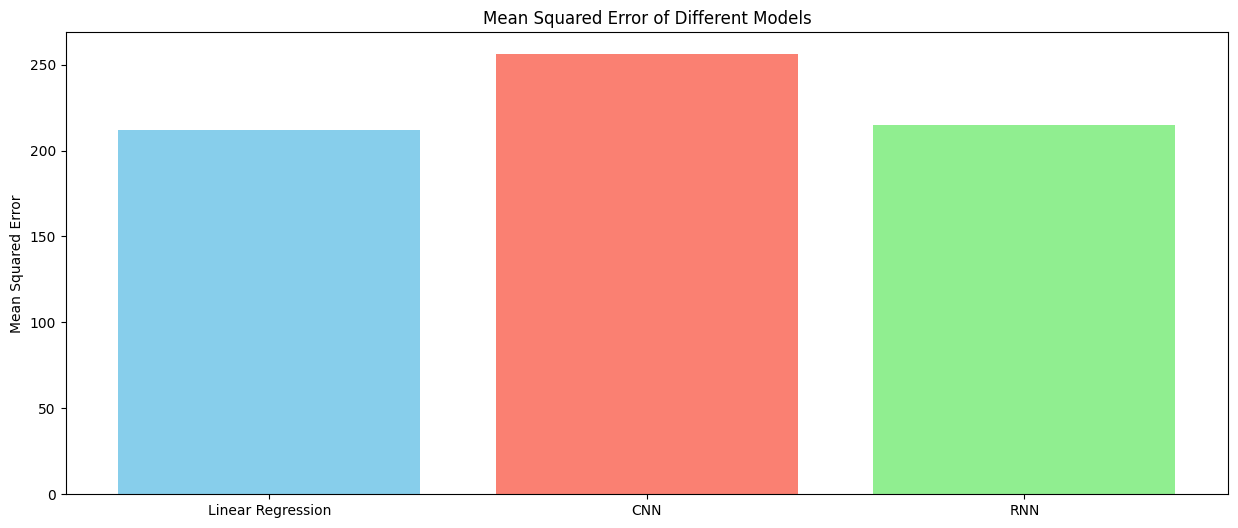

In [27]:
# MSE values
mse_linear = mean_squared_error(y_pred, y_test)
mse_cnn = test_loss.numpy()
mse_rnn = mean_squared_error(model.forward(X_test_dl.reshape(-1, 1, 2)), y_test_dl)

# Plotting the MSE comparison
plt.figure(figsize=(15, 6))
plt.bar(['Linear Regression', 'CNN', 'RNN'], [mse_linear, mse_cnn, mse_rnn], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.show()

In [28]:
model = SimpleRNN(input_size=2, hidden_size=64)

# Load weights
model.Wxh = tf.Variable(np.load('./rnn/Wxh.npy'))
model.Whh = tf.Variable(np.load('./rnn/Whh.npy'))
model.bh = tf.Variable(np.load('./rnn/bh.npy'))
model.Why = tf.Variable(np.load('./rnn/Why.npy'))
model.by = tf.Variable(np.load('./rnn/by.npy'))

# Predict
weight_predict = model.forward(np.array([[1.82, 29]]).astype(np.float32).reshape(-1,1,2))
weight_predict[0][0].numpy()

74.84092